In [238]:
# 시계열 분석 및 응용 책의 예제 및 연습문제 풀이

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplot inline
import seaborn as sns

UsageError: Line magic function `%matplot` not found.


예 1.1 다음은 연도별 (2006 ~ 2016) 우리나라의 산불 건수를 나타낸 것이다. N=3, N=6 에 대한 단순 이동 평균을 각각 산출하여라.

In [ ]:
forestFires = {2006:369,2007:418,2008:389,2009:570,2010:282,2010:282,2011:277,2012:197,2013:296,2014:492,2015:623,2016:391}

In [ ]:
forestFires

In [ ]:
forestFires_df = pd.DataFrame(forestFires,index=['건수'])

In [ ]:
forestFires_df=forestFires_df.transpose()
forestFires_df

**단순 이동 평균 (Simple Moving Average, SMA)**
단순히 주어진 기간 동안의 지난 종가들을 모두 합해서 계산에 쓰이는 가격들의 개수로 나누는 것이죠. 예를 들면 10일간의 이동 평균은 지난 10개의 종가를 모두 더해서 10으로 나눔

In [ ]:
# N=3 에 대한 단순 이동 평균은 지난 3개년동안 산불횟수를 모두 더해서 3으로 나눈 값 
# N=6 에 대한 단순 이동 평균은 지난 6개년동안 산불횟수를 모두 더해서 6으로 나눈 값 

In [ ]:
print("N=3에 대한 단순 이동 평균은" , forestFires_df[-3:].mean())
print("N=5에 대한 단순 이동 평균은" , forestFires_df[-6:].mean())

**하지만 정답에서 요구한 것은 각 시점별 단순 이동 평균이었고, 내가 구한 것은 t=2016 한 시점동안의 단순 이동 평균이었다**

In [ ]:
forestFires_df['N=3']=pd.DataFrame(range(len(forestFires)))

In [240]:
forestFires_df['N=3'][2006]

0.0

In [241]:
forestFires_df['N=3']
for i in range(2006,2017):
    if i<2008 :
        forestFires_df['N=3'][i]=np.nan
    else:
        forestFires_df['N=3'][i]=int(forestFires_df.loc[i-2:i,'건수'].mean())

/var/folders/sy/lzv1b4r92bqb6hy15tk2qy5h0000gn/T/ipykernel_1596/4110234258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forestFires_df['N=3'][i]=np.nan
/var/folders/sy/lzv1b4r92bqb6hy15tk2qy5h0000gn/T/ipykernel_1596/4110234258.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forestFires_df['N=3'][i]=int(forestFires_df.loc[i-2:i,'건수'].mean())


In [242]:
forestFires_df

,건수,N=3,N=6
2006,369,NaN,0.0
2007,418,NaN,0.0
2008,389,392.0,0.0
2009,570,459.0,0.0
2010,282,413.0,0.0
2011,277,376.0,384.0
2012,197,252.0,355.0
2013,296,256.0,335.0
2014,492,328.0,352.0
2015,623,470.0,361.0


**N=6에 대하여 이동 평균 구하기**

In [243]:
forestFires_df['N=6']=pd.DataFrame(range(len(forestFires)))

In [244]:

for i in range(2006,2017):
    if i<2011 :
        forestFires_df['N=6'][i]=np.nan
    else:
        forestFires_df['N=6'][i]=int(forestFires_df.loc[i-5:i,'건수'].mean())

/var/folders/sy/lzv1b4r92bqb6hy15tk2qy5h0000gn/T/ipykernel_1596/2665824803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forestFires_df['N=6'][i]=np.nan
/var/folders/sy/lzv1b4r92bqb6hy15tk2qy5h0000gn/T/ipykernel_1596/2665824803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forestFires_df['N=6'][i]=int(forestFires_df.loc[i-5:i,'건수'].mean())


In [245]:
forestFires_df

,건수,N=3,N=6
2006,369,NaN,NaN
2007,418,NaN,NaN
2008,389,392.0,NaN
2009,570,459.0,NaN
2010,282,413.0,NaN
2011,277,376.0,384.0
2012,197,252.0,355.0
2013,296,256.0,335.0
2014,492,328.0,352.0
2015,623,470.0,361.0


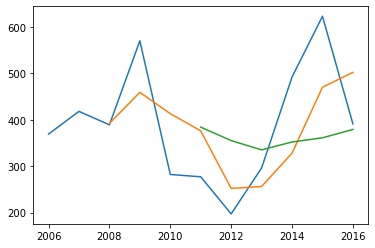

In [246]:
plt.plot(forestFires_df)